<a href="https://colab.research.google.com/github/Peishino/D.S.A_mini_projeto/blob/main/D_S_A_mini_projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q pycountry
!pip install -q imdb-sqlite

In [ ]:
# importando alguns pacotes que serão necessários para a analise de dados.
# caso não possua algum utilize !pip install "pacote"
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

# Banco de dados

In [ ]:
# com esse comando baixaremos os dados que iremos utilizar
!imdb-sqlite

2022-04-04 13:10:48,066 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2022-04-04 13:10:51,078 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2022-04-04 13:10:53,198 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2022-04-04 13:10:55,600 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2022-04-04 13:10:59,482 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2022-04-04 13:11:00,129 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2022-04-04 13:11:00,250 Populating database: imdb.db
2022-04-04 13:11:00,250 Applying schema
2022-04-04 13:11:00,253 Importing file: downloads/name.basics.tsv.gz
2022-04-04 13:11:00,253 Reading number of rows ...
2022-04-04 13:11:09,095 Inserting rows into table: people
100% 11528993/11528993 [01:56<00:00, 99290.33 rows/s]
2022-04-04 13:1

In [ ]:
# fazendo a conexão no banco de dados 
conn = sqlite3.connect("imdb.db")
# lista de tabelas
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn )

In [ ]:
tabelas.head() # <---- isso é um data frame 

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [ ]:
# queremos converter em uma lista
tabelas = tabelas["Table_Name"].values.tolist()
# como sao varias listas queremos extrair cada uma delas
for tabela in tabelas:
  consulta = "PRAGMA TABLE_INFO({})".format(tabela)
  resultado = pd.read_sql_query(consulta,conn)
  print("Esquema da tabela : ",tabela)
  display(resultado)
  print("-"*100)
  print("\n")

Esquema da tabela :  people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela :  titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela :  akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela :  crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela :  episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela :  ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# Primeira pergunta 
quais são as categorias mais comuns? (séries/ filmes/ programas de tv...)


In [9]:
# para isso precisaremos ver qual das listas acima trabalha com categorias (no caso é a "titles")
# aqui nos selecionamos o tipo e o numero de titulos da lista "titles"
titulos = ''' SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type '''
# gravar a lista na variavel 
pergunta1 = pd.read_sql_query(titulos,conn)
# exibe a lista 
display(pergunta1) 

,type,COUNT
0,movie,606294
1,short,863251
2,tvEpisode,6613989
3,tvMiniSeries,42841
4,tvMovie,135603
5,tvPilot,2
6,tvSeries,223017
7,tvShort,10511
8,tvSpecial,36467
9,video,258883


In [10]:
# com isso ja conseguiriamos responder a pergunta mas vamos tentar deixar isso mais facil de interpretar
# vamos criar outra coluna de percentual de cada um
pergunta1["percentual"] = (pergunta1["COUNT"] / pergunta1["COUNT"].sum()) * 100
display(pergunta1)

,type,COUNT,percentual
0,movie,606294,6.872776
1,short,863251,9.785568
2,tvEpisode,6613989,74.974299
3,tvMiniSeries,42841,0.485633
4,tvMovie,135603,1.537157
5,tvPilot,2,0.000023
6,tvSeries,223017,2.528057
7,tvShort,10511,0.119150
8,tvSpecial,36467,0.413380
9,video,258883,2.934624


In [11]:
# bem melhor né? mas ainda parece muita informação jogada, vamos tentar criar um grafico bonitinho
# o grafico ira ser composto de 3 grandes categorias e uma composta do resto = "outros"

outros = {}
# vamos falar que todas as categorias que tiverem seu percentual menor que 5 será adicionado no grupo de "outros"
outros['COUNT'] = pergunta1[pergunta1['percentual']< 5]["COUNT"].sum()
# e esse "outros" terá sua % = a soma de todas as % menores que 5 
outros['percentual'] = pergunta1[pergunta1['percentual']< 5]["percentual"].sum()
# deixar o nome no type
outros['type'] = 'outros'
outros

{'COUNT': 738141, 'percentual': 8.367356539432704, 'type': 'outros'}

In [12]:
# colocando somente os valores maiores que 5 em "pergunta1" para não repetir a informação que atribuimos a "outros"
pergunta1 = pergunta1[pergunta1['percentual']> 5]
pergunta1 = pergunta1.append(outros, ignore_index = True)
pergunta1 = pergunta1.sort_values(by = 'COUNT', ascending = False)
pergunta1

,type,COUNT,percentual
2,tvEpisode,6613989,74.974299
1,short,863251,9.785568
3,outros,738141,8.367357
0,movie,606294,6.872776


In [13]:
# ajustando os labels
# ele diz que:
# para cada item na tabela em "pergunta1" iremos criar uma string com o "type" dessa tabela um espaço ("") 
# e o "percentual" em colchetes arredondando as 2 casas decimais e por fim colocando o sinal "%" para indicar porcentagem
# um exemplo de como vai ficar : tvEpisode [74,92%]
labels = [str(pergunta1['type'][i])+' '+'['+str(round(pergunta1['percentual'][i],2)) +'%'+']' for i in pergunta1.index]

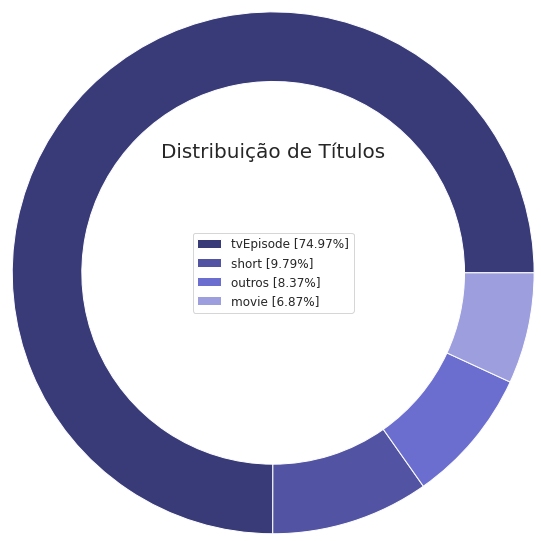

In [14]:
# agora que ja temos tudo podemos criar o gráfico
# selecionando as cores
cores = cm.tab20b(np.arange(100))
# com o pie criariamos um grafico de pizza, mas vamos customiza-lo para fazer um de "rosca" 
plt.pie(pergunta1['COUNT'], labeldistance = 1, radius = 3, colors = cores, wedgeprops = dict(width = 0.8))
# aqui colocamos a legenda que no caso são os labels e onde queremos que essas informações fiquem
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
# o titulo e sua formatação
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
# e aqui vemos o gráfico
plt.show()

# Segunda pergunta
qual número de títulos por gênero?

In [15]:
# selecionamos os generos la da mesma lista "titles" onde o tipo for "movie" e agrupar por generos 
genero = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 
pergunta2 = pd.read_sql_query(genero, conn)
display(pergunta2)

,genres,COUNT(*)
0,Action,13941
1,"Action,Adult",11
2,"Action,Adult,Adventure",1
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1451,"Thriller,Western",44
1452,War,1290
1453,"War,Western",14
1454,Western,5159


In [16]:
# transformar as strings em minusculo 
pergunta2['genres'] = pergunta2['genres'].str.lower().values
# vamos retirar aqueles que não possuem genero
temp = pergunta2['genres'].dropna()

In [17]:
# criando um vetor usando expressão regular para filtrar as strings
# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'
# transforma em uma matriz espaça o que faz com que se torne mais vizivel aqueles filmes que possuem 2 ou + generos
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)
# Aplica a vetorização ao dataset transformando em uma matriz
matriz = vetor.transform(temp)

In [18]:
# vamos agora criar uma variavel para salver os nomes dos generos
generos_unicos = vetor.get_feature_names()
# convertemos para dataframe
dfgeneros = pd.DataFrame(matriz.todense(), columns = generos_unicos, index = temp.index)
# importante conferir para ver se não tem algum dado que não iremos utilizar no df 
dfgeneros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1456 non-null   int64
 1   adult        1456 non-null   int64
 2   adventure    1456 non-null   int64
 3   animation    1456 non-null   int64
 4   biography    1456 non-null   int64
 5   comedy       1456 non-null   int64
 6   crime        1456 non-null   int64
 7   documentary  1456 non-null   int64
 8   drama        1456 non-null   int64
 9   family       1456 non-null   int64
 10  fantasy      1456 non-null   int64
 11  film-noir    1456 non-null   int64
 12  game-show    1456 non-null   int64
 13  history      1456 non-null   int64
 14  horror       1456 non-null   int64
 15  music        1456 non-null   int64
 16  musical      1456 non-null   int64
 17  mystery      1456 non-null   int64
 18  n            1456 non-null   int64
 19  news         1456 non-null   int64
 20  reality-

In [19]:
# vamos remover a coluna "n" ja q ela não é uma categoria
dfgeneros = dfgeneros.drop(columns = 'n', axis = 0)

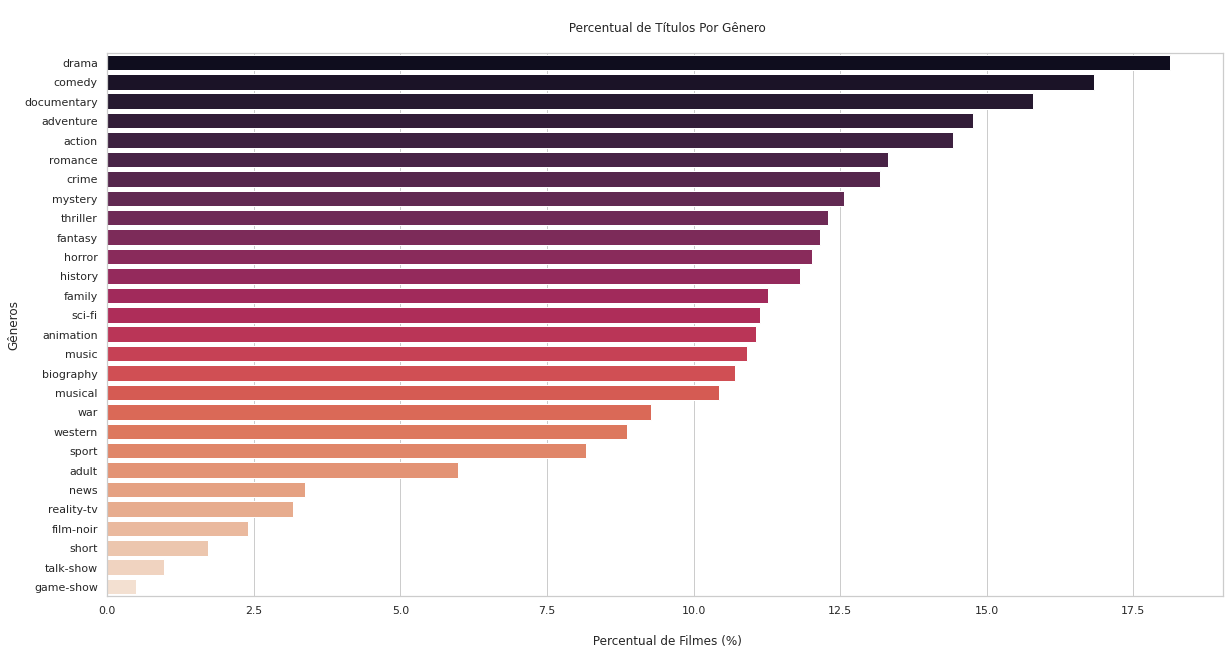

In [20]:
# criamos o percentual 
generos_percentual = 100 * pd.Series(dfgeneros.sum()).sort_values(ascending = False) / dfgeneros.shape[0]
# e o nosso grafico de barras com cada % indicada de filmes
plt.figure(figsize = (20,10))
# o grafico onde x ---> vão ser os percentuais e y ^^^^ os gêrenos dos filmes
sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "rocket" )
plt.ylabel('Gêneros')             
plt.xlabel("\n Percentual de Filmes (%)")
plt.title('\n Percentual de Títulos Por Gênero\n')
plt.show()

# Terceira pergunta
Qual a mediana de avaliação dos filmes por gênero?

In [21]:
# selecionar o "rating" e o "genres" das
# tabela "rating" e a tabela "titles" usando a regra de junção pelo id
# onde premiado antes ou em 2022 e o seu tipo for = a "movie"
avaliacao = '''
            SELECT rating, genres FROM
            ratings JOIN titles ON ratings.title_id = titles.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            '''     
pergunta3 = pd.read_sql_query(avaliacao, conn)
display(pergunta3)

,rating,genres
0,4.5,\N
1,6.0,"Action,Adventure,Biography"
2,4.6,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
276737,5.8,Thriller
276738,6.4,"Drama,History"
276739,3.6,"Adventure,History,War"
276740,8.3,Drama


In [22]:
# como tivemos o memso problema de filmes terem o mesmo genero, precisaremos utilizar o método de matrizes que utilizamos na pergunta anterior 
# mas vamos fazer isso em uma função :D
def retorna_generos(df):
    df['genres'] = df['genres'].str.lower().values
    temp = df['genres'].dropna()
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp)
    generos_unicos =  vetor.get_feature_names()
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1]
    return generos_unicos
generos_unicos = retorna_generos(pergunta3)

In [26]:
# criareomo 2 listas vazias para serem preenchidas com os generos e com as avaliações
genero_counts = []
genero_ratings = []

for item in generos_unicos:
    
    # retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_counts.append(resultado.values[0][0])
  
     # retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_ratings.append(np.median(resultado['rating']))

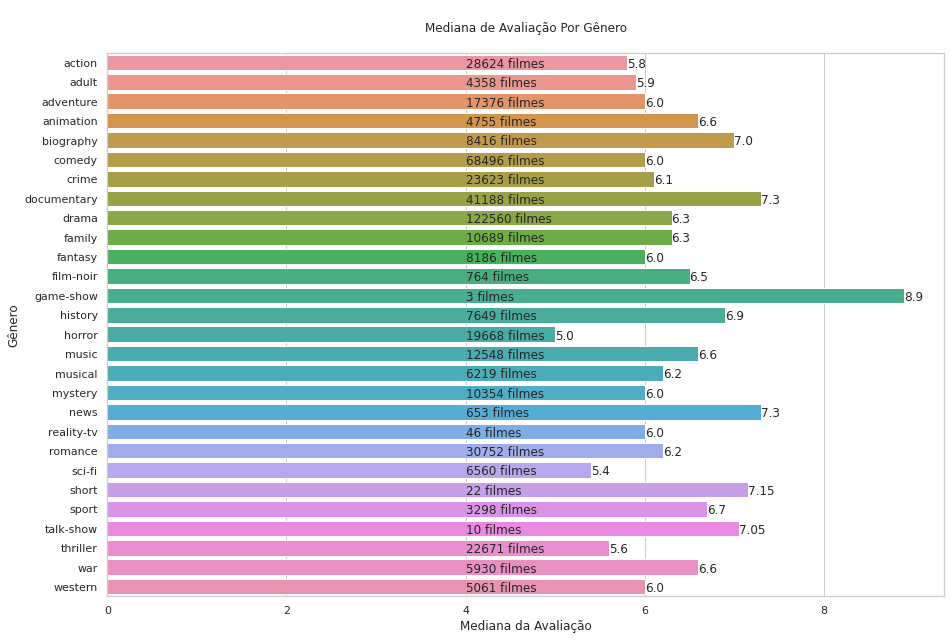

In [27]:
# dataframe final
df_genero_ratings = pd.DataFrame()
df_genero_ratings['genres'] = generos_unicos # <-- os generos
df_genero_ratings['count'] = genero_counts # <-- as avaliações por genero
df_genero_ratings['rating'] = genero_ratings # <-- a mediana das avaliações
# até aqui eu conseguiria responder a pergunta com  o  comando df_genero_ratings.head(20)
# mas para uma resposta mais bem elaborada criaremos outro gráfico
plt.figure(figsize = (15,10))
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")
for i in range(len(df_genero_ratings.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]],
             i + 0.25,
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))

plt.ylabel('Gênero')             
plt.xlabel('Mediana da Avaliação')
plt.title('\nMediana de Avaliação Por Gênero\n')
plt.show()

# Quarta pergunta
Qual a mediana de avaliação dos filmes em relação ao ano de estréia?


In [28]:
# selecionar rating como avaliação e ano premiado da lista ratings e titles organizadas pelo seu id
# onde ano premiado for menor ou igual a 2022 e o tipo for filme
# e ordenar por ano premiado
rating_ano = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            ''' 
pergunta4 = pd.read_sql_query(rating_ano, conn)
display(pergunta4)

,Rating,premiered
0,6.2,1896
1,4.5,1897
2,4.0,1899
3,3.7,1899
4,6.0,1900
...,...,...
276737,9.2,2022
276738,5.4,2022
276739,6.0,2022
276740,5.1,2022


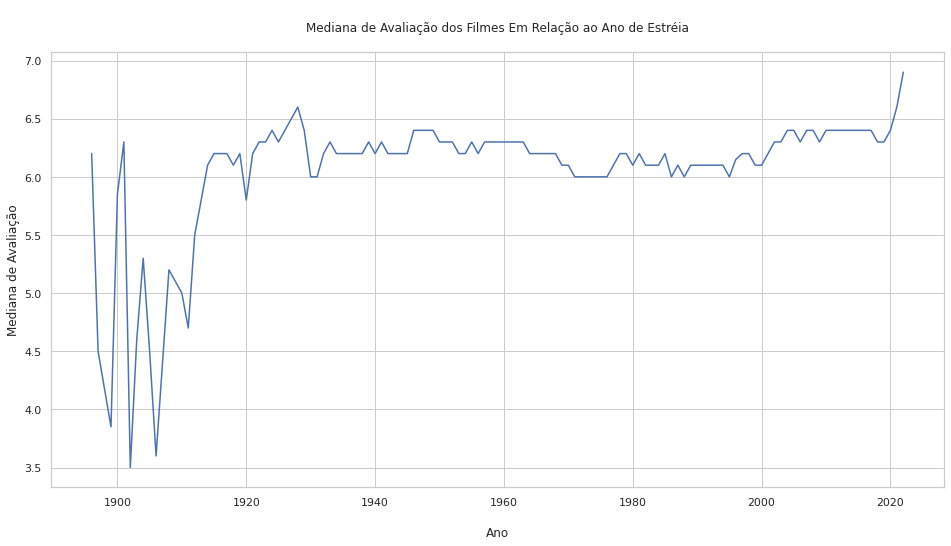

In [29]:
# criamos uma lista vazia de ratings 
# e para cada ano em (pergunta4[ano premiado])
# adicionamos a lista vazia a mediana de anos e avaliações
ratings = []
for year in set(pergunta4['premiered']):
    ratings.append(np.median(pergunta4[pergunta4['premiered'] == year]['Rating']))
# e a lista de anos:
anos = list(set(pergunta4['premiered']))
# e aqui fazemos o gráfico
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

# Quinta pergunta
Qual o número de filmes avaliados por gênero em relação ao ano de estréia

In [30]:
# selecionar generos da lista titles
genero_ano = '''SELECT genres FROM titles ''' 
pergunta5 = pd.read_sql_query(genero_ano, conn)
display(pergunta5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8821670,"Action,Drama,Family"
8821671,"Action,Drama,Family"
8821672,"Action,Drama,Family"
8821673,Short


In [31]:
# queremos os generos unicos (e nao iremos reautilizar os generos unicos uzados anteriormente)
generos_unicos = retorna_generos(pergunta5)
# para cada genero unico selecionamos o count da lista titles onde os generos forem iguais ao "item", o tipo igual ao filme e premiado antes ou durante 2022
genero_count = []
for item in generos_unicos:
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn)
    genero_count.append(resultado['COUNT'].values[0])
# e preparamos o dataframe 
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

In [32]:
# pegamos os 5 generos principais 
# filtramos para remover o "n"
# ordenamos os resultados
# e chamamos o head() que retornam os 5 primeiros
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n']
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False)
top_generos = df_genero_count.head()['genre'].values

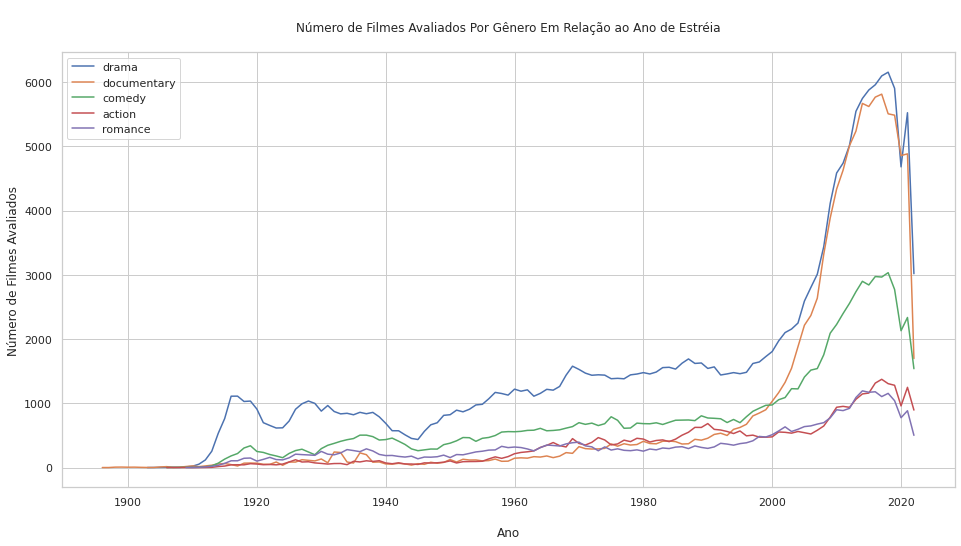

In [33]:
# e vamos vizualizar melhor no gráfico
plt.figure(figsize = (16,8))
# para cada item na lista dos 5 melhores:
# fazemos a consulta sql 
for item in top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

# Sexta pergunta
Qual o filme com maior tempo de duração? Calcule os Percentis.

In [34]:
# selecionamos o tempo de duração da coluna runtime_minutes da tabela titles onde tipo for filme e não for indefinido
filme = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 
# Resultado
pergunta6 = pd.read_sql_query(filme, conn)
display(pergunta6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
381559,123
381560,57
381561,100
381562,116


In [35]:
# para cada item no alcance de 101 pois queremos de 0 a 100 percentis
for i in range(101): 
    val = i
    perc = round(np.percentile(pergunta6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 47.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 53.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 61.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 70.0
23 percentil da duração (runtime) é: 72.0
24 

In [36]:
# refazendo a consulta e retornando o filme com maior duração
# unica diferença é o order by, onde ordenamos que seja de acordo com o tempo de filme em ordem decrescente 
filme = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 
pergunta6 = pd.read_sql_query(filme, conn)
pergunta6

,Runtime,primary_title
0,51420,Logistics


# Sétima pergunta
Qual a relação entre duração e gênero?

In [37]:
# selecionamos a media de tempo dos filmes por genero 
# da tabela titles
# onde tipo = filmes
# e o tempo n for indefinido
# agrupar por genero
duracao = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 
pergunta7 = pd.read_sql_query(duracao, conn)
generos_unicos = retorna_generos(pergunta7)
# mesma ideia da pergunta numero 5
# para cada genero unico selecionamos o count da lista titles onde os generos forem iguais ao "item", o tipo igual ao filme e o tempo nao for indefinido
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

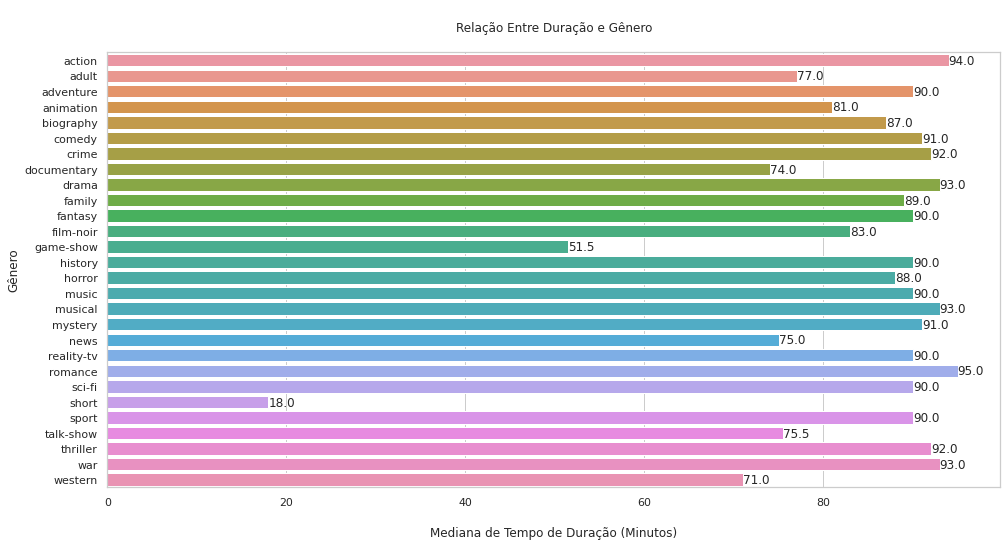

In [38]:
# prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime
# e o grafico
plt.figure(figsize = (16,8))
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))
plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

# Oitava pergunta
Qual o número de filmes produzidos por país?

In [39]:
# selecionamos a regiao, fazemos o count do numero de filmes da 
# tabela akas + titles onde akas e titles tiverem os mesmos id's
# onde a região não pode ser indefinida e o tipo for = filme
# agrupamos por regiao
filmes_pais = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 
pergunta8 = pd.read_sql_query(filmes_pais, conn)
display(pergunta8)

,region,Number_of_movies
0,AD,22
1,AE,6065
2,AF,112
3,AG,12
4,AL,1280
...,...,...
229,YUCS,153
230,ZA,3210
231,ZM,15
232,ZRCD,2


In [40]:
# criamos listas vazias de nomes de paises e da contagem de filmes
nomes_paises = []
contagem = []
# loop para obter o país de acordo com a região
# para item no alcance do shape da lista
# tente retornar os valores de regiao da variavel "pergunta8"
# adicionamos a lista vazia "nomes_paises"
# e adicionamos os valores de "number of movies" da variavel "pergunta8" a contagem de filmes
for i in range(pergunta8.shape[0]):
    try:
        coun = pergunta8['region'].values[i]
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
        contagem.append(pergunta8['Number_of_movies'].values[i])
    except: 
        continue

In [41]:
# prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem
# odrenamos o resultado e chamamos os 10 
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,309757
65,United Kingdom,159106
96,Japan,91172
63,France,84449
89,India,80621
32,Canada,77215
47,Germany,70573
26,Brazil,65288
93,Italy,65184
58,Spain,65147


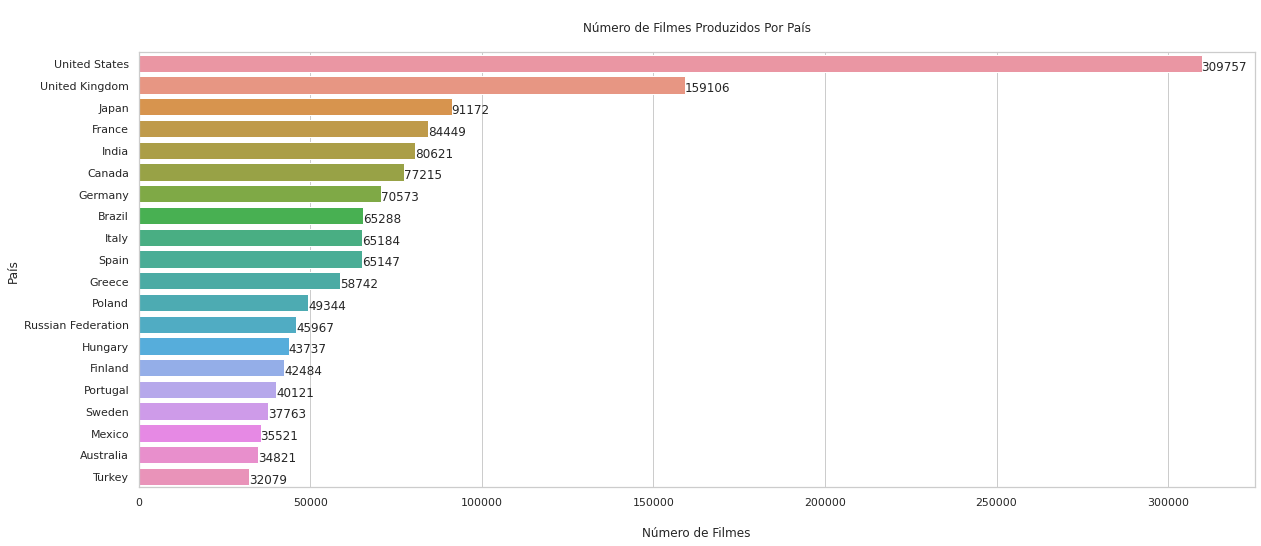

In [42]:
# gráfico
plt.figure(figsize = (20,8))
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")
for i in range(0,20):
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))
plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

# Nona pergunta
Quais são os top 10 melhores filmes?

In [43]:
# selecionamos primary_titles como Movie_Name, generos, e avaliação da lista titles e ratings
# em que ordenados pelos mesmos id's
# onde tipo = filme e os votos de avaliação forem maiores ou iguais a 25000
# fazer a ordem decrescente e limitar por 10
top_10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            ''' 
pergunta9 = pd.read_sql_query(top_10, conn)
display(pergunta9)

,Movie_Name,genres,rating
0,Jai Bhim,"Crime,Drama,Mystery",9.4
1,The Shawshank Redemption,Drama,9.3
2,The Chaos Class,"Comedy,Drama",9.3
3,Soorarai Pottru,Drama,9.3
4,Mirror Game,"Crime,Mystery,Thriller",9.3
5,The Godfather,"Crime,Drama",9.2
6,CM101MMXI Fundamentals,"Comedy,Documentary",9.2
7,The Dark Knight,"Action,Crime,Drama",9.1
8,RRR,"Action,Drama",9.1
9,12 Angry Men,"Crime,Drama",9.0


# Décima pergunta
Quais são os top 10 piores filmes?

In [44]:
# basicamente a mesma coisa da outra pergunta, a unica diferença é o "ASC" do "DESC"
# enquanto "DESC" mostra por ordem decrescente, "asc" mostra por ordem crescente
bot_10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 
pergunta10 = pd.read_sql_query(bot_10, conn)
display(pergunta10)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.1
1,Sadak 2,"Action,Drama",1.1
2,Smolensk,"Drama,Thriller",1.2
3,The Cost of Deception,"Crime,Drama,History",1.6
4,Reis,"Biography,Drama",1.6
5,Justin Bieber: Never Say Never,"Documentary,Music",1.7
6,Manos: The Hands of Fate,Horror,1.9
7,Radhe,"Action,Crime,Thriller",1.9
8,Disaster Movie,"Comedy,Sci-Fi",1.9
9,The Hottie & the Nottie,"Comedy,Romance",2.0
